In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

In [2]:
binw_hour = 3 # 3 hours
window_size = 300 #length of waveform (set at CAEN ADC)

In [3]:
pkl_files = ['../../data/2023-11-15_DR_LONG/CH0_KM56206_1100v_CH1_PN2305-1100_1200v-1_dr_clocktime.pkl',
             '../../data/2023-11-15_DR_LONG/CH0_KM56206_1100v_CH1_PN2305-1100_1200v-2_dr_clocktime.pkl',
             '../../data/2023-11-15_DR_LONG/CH0_KM56206_1100v_CH1_PN2305-1100_1200v-3_dr_clocktime.pkl',
             '../../data/2023-11-15_DR_LONG/CH0_KM56206_1100v_CH1_PN2305-1100_1200v-4_dr_clocktime.pkl',
             '../../data/2023-11-15_DR_LONG/CH0_KM56206_1100v_CH1_PN2305-1100_1200v-5_dr_clocktime.pkl',
             '../../data/2023-11-15_DR_LONG/CH0_KM56206_1100v_CH1_PN2305-1100_1200v-6_dr_clocktime.pkl'
            ]

In [4]:
df = pd.DataFrame()
dat = np.empty(0)
run_start_times = []
run_stop_times = []
for file in pkl_files:
    print(file)
    df_tmp = pd.read_pickle(file)
    cols_tmp=df_tmp.columns
    cols = []
    for i in range(cols_tmp.values.shape[0]):
        cols.append(cols_tmp[i].replace('_passes',''))
    indice=df_tmp.index.values
    dat_tmp=df_tmp.values
    run_start_times.append(min(dat_tmp[0][0]))
    run_stop_times.append(max(dat_tmp[0][0]))

    if len(dat) == 0:
        dat = dat_tmp
    else:
        for i in range(len(indice)):
            for j in range(len(cols)-1): # last col is threshold
                dat[i][j] = np.concatenate( [dat[i][j], dat_tmp[i][j]], axis=0 ).astype(np.int64)



../../data/2023-11-15_DR_LONG/CH0_KM56206_1100v_CH1_PN2305-1100_1200v-1_dr_clocktime.pkl
../../data/2023-11-15_DR_LONG/CH0_KM56206_1100v_CH1_PN2305-1100_1200v-2_dr_clocktime.pkl
../../data/2023-11-15_DR_LONG/CH0_KM56206_1100v_CH1_PN2305-1100_1200v-3_dr_clocktime.pkl
../../data/2023-11-15_DR_LONG/CH0_KM56206_1100v_CH1_PN2305-1100_1200v-4_dr_clocktime.pkl
../../data/2023-11-15_DR_LONG/CH0_KM56206_1100v_CH1_PN2305-1100_1200v-5_dr_clocktime.pkl
../../data/2023-11-15_DR_LONG/CH0_KM56206_1100v_CH1_PN2305-1100_1200v-6_dr_clocktime.pkl


In [5]:
start=dat[0][0].min()
stop=dat[0][0].max()
binw=3600*binw_hour
bin=int( (stop-start)/binw )

In [6]:
run_change_times = np.array([ [int(run_stop_times[i])-start, int(run_start_times[i+1])-start] for i in range(len(run_start_times)-1) ]) / 3600.
run_change_datetime = np.array(run_change_times*3600+start).astype(dtype='datetime64[s]')

/tmp/ipykernel_964067/1184530810.py:27: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


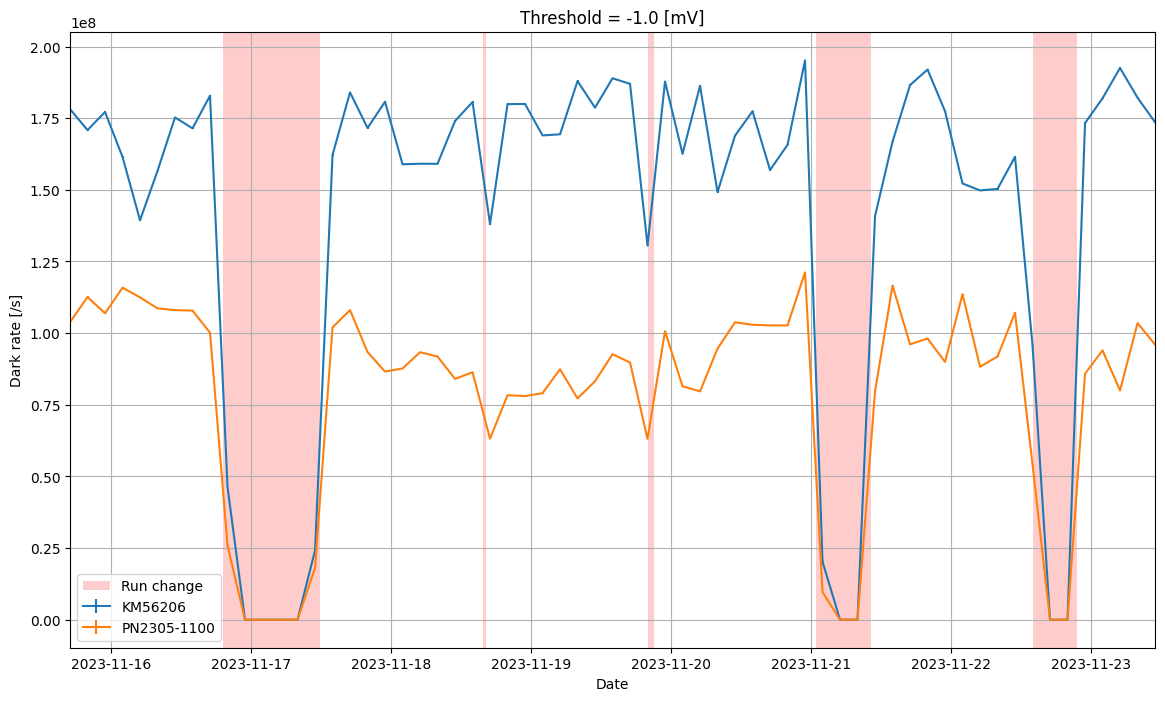

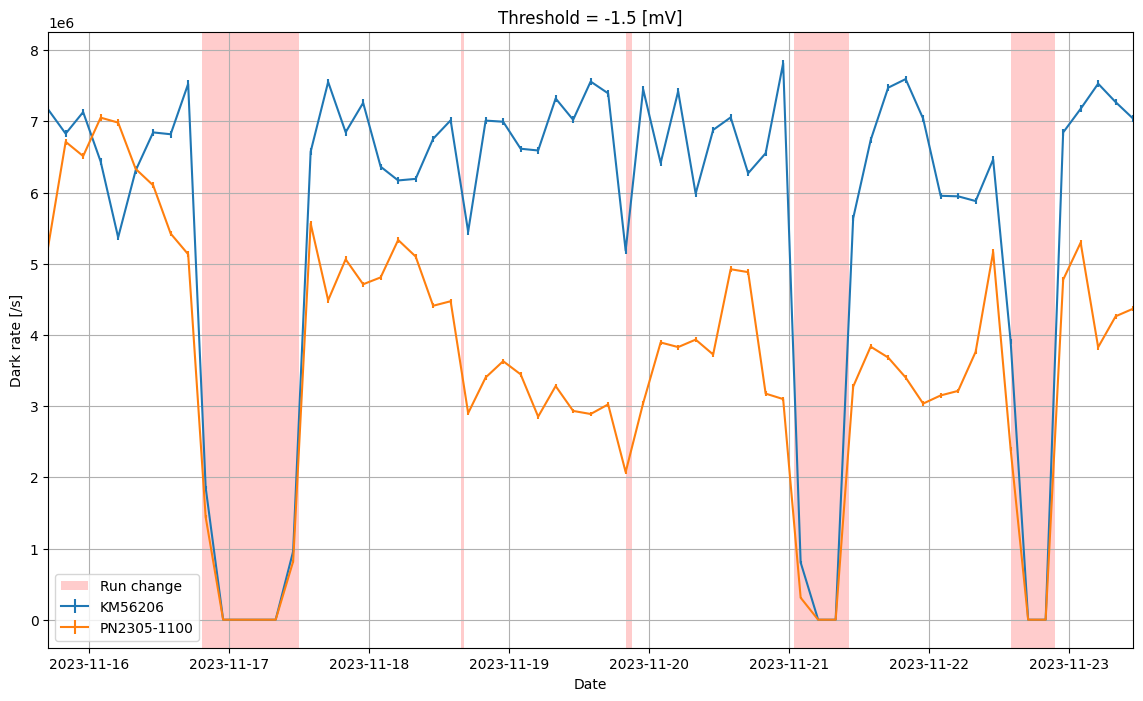

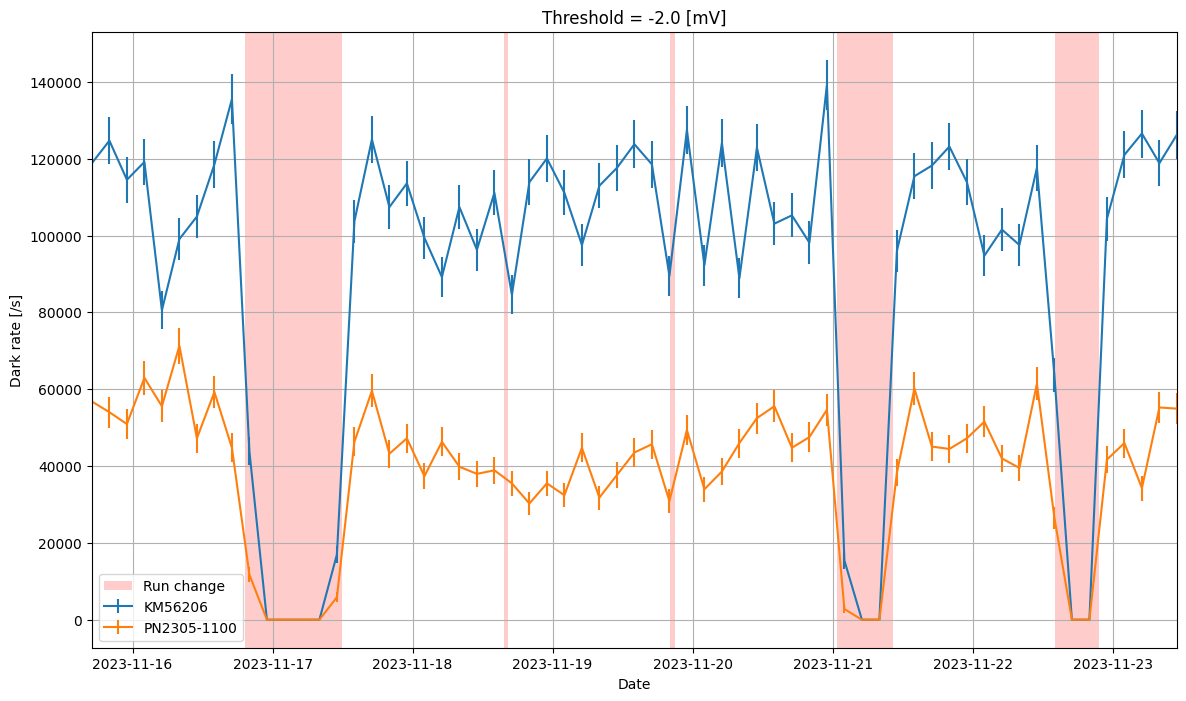

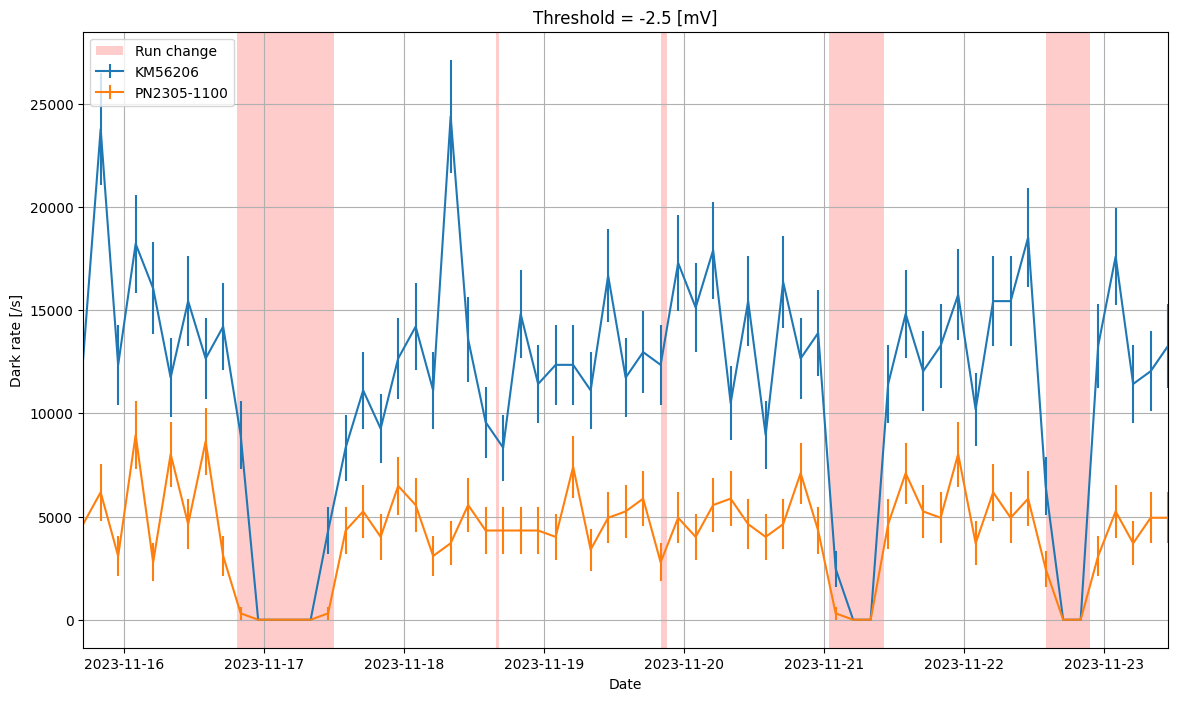

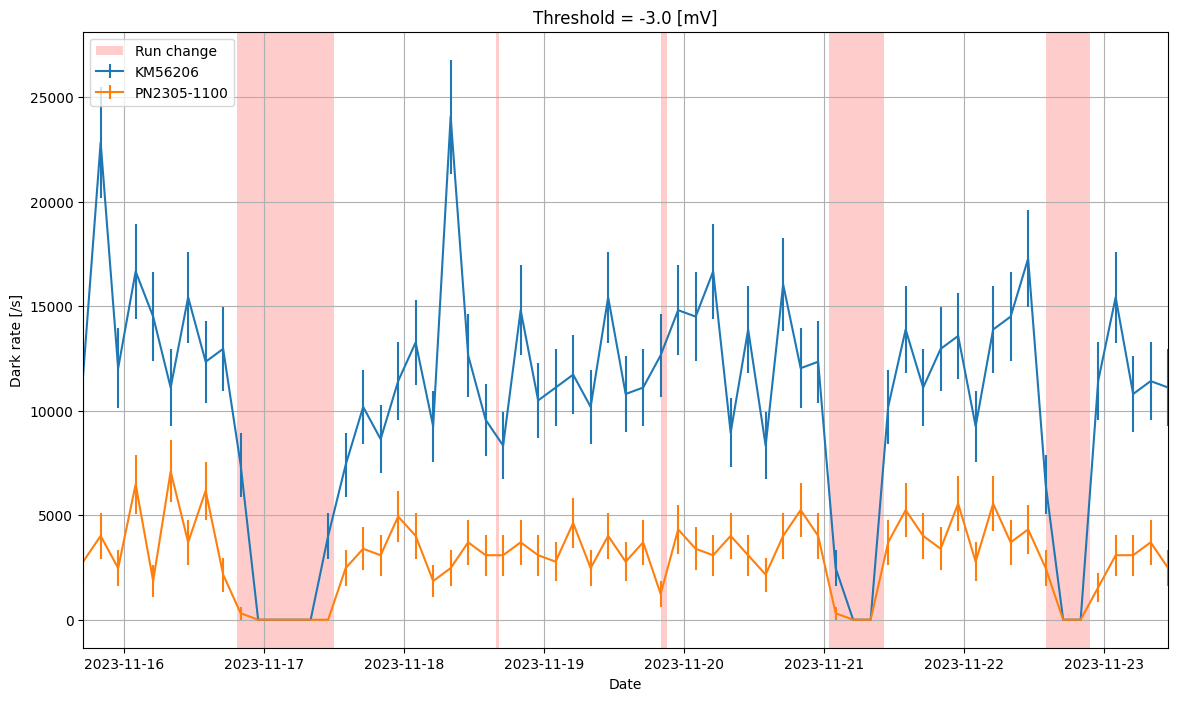

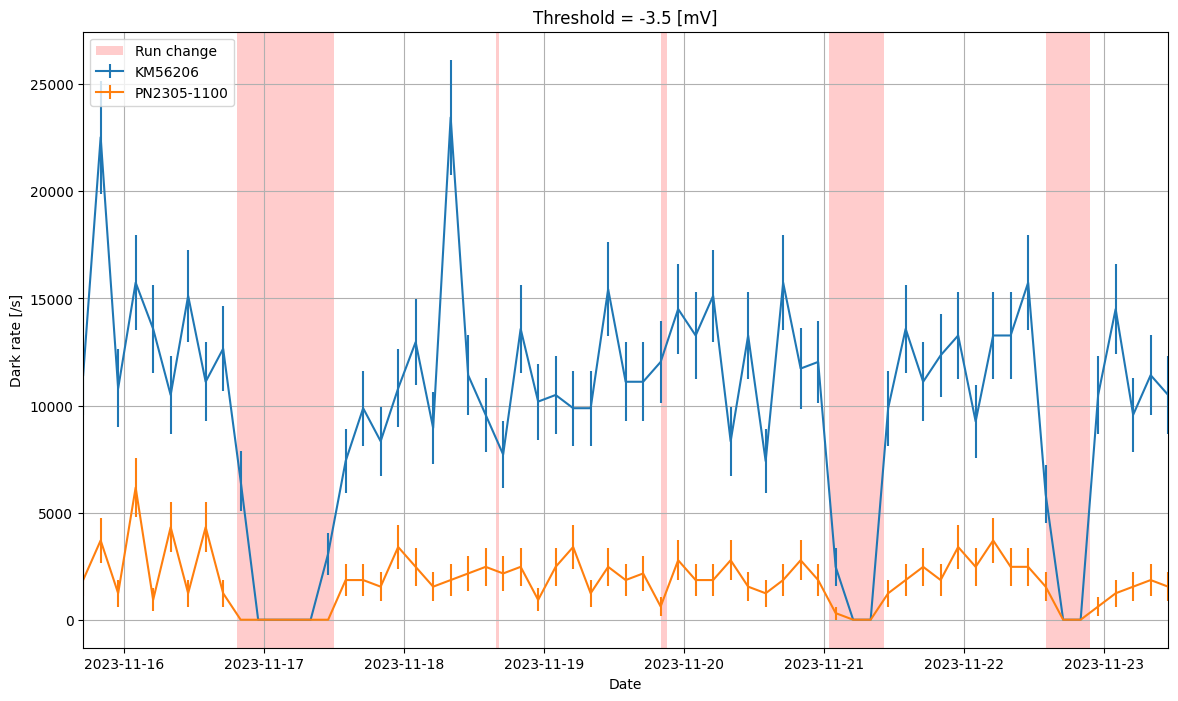

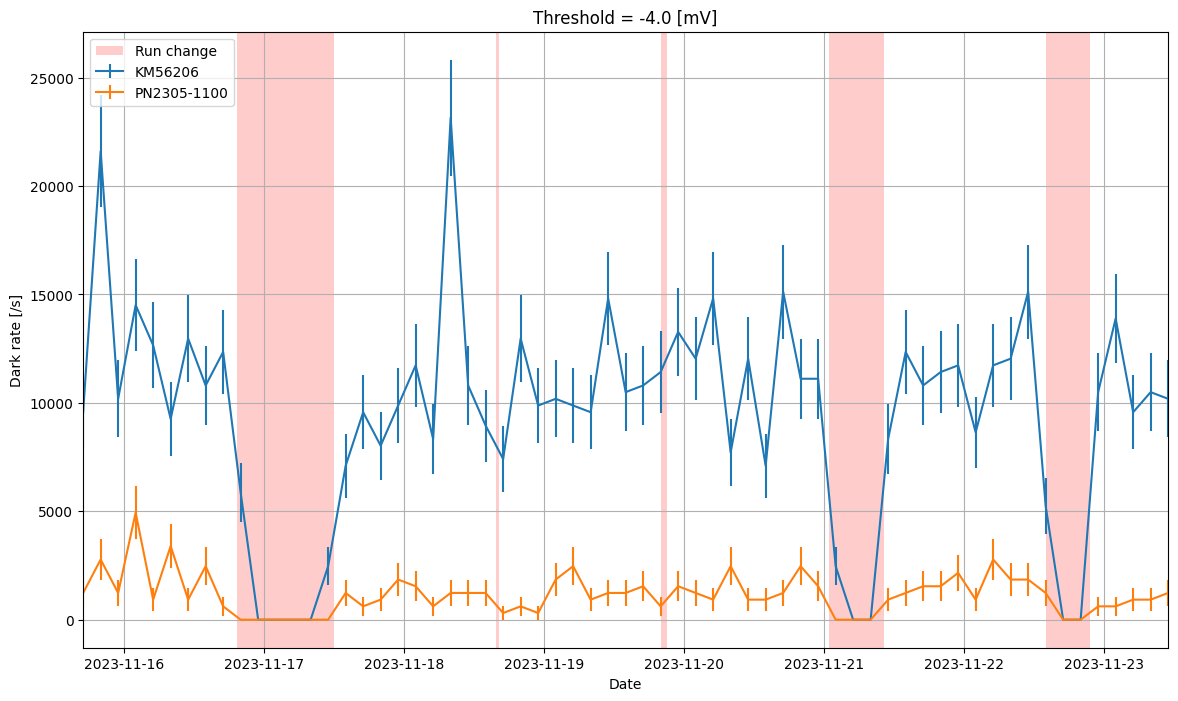

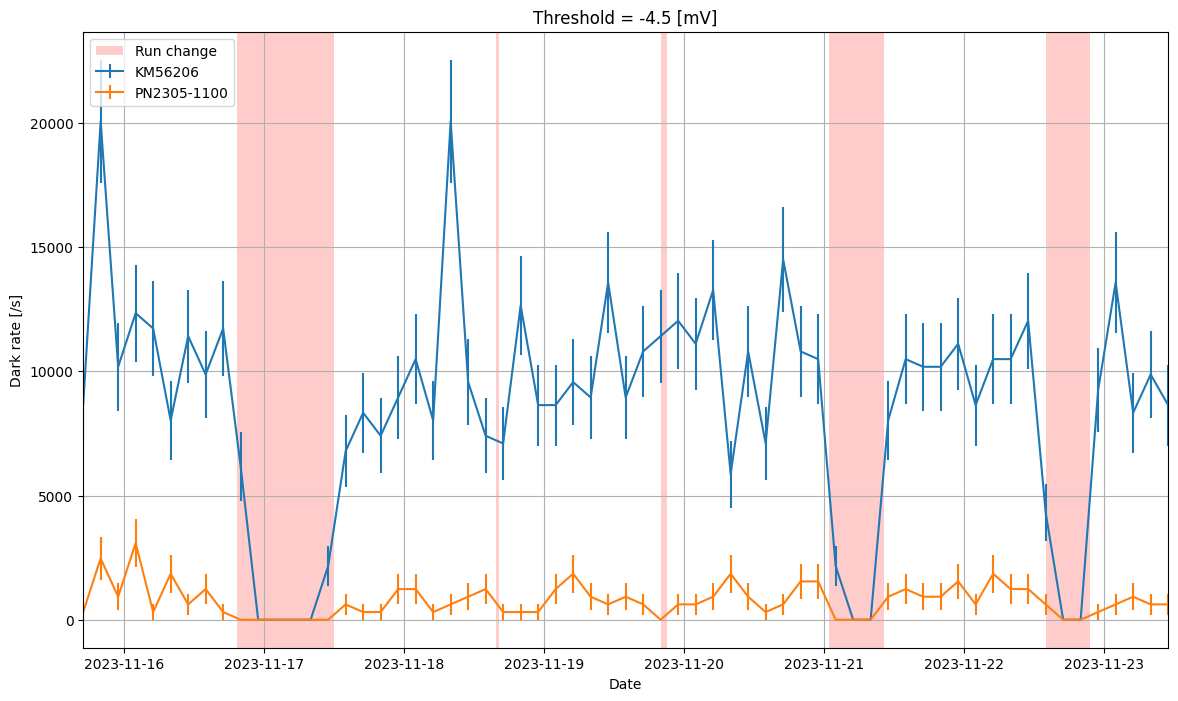

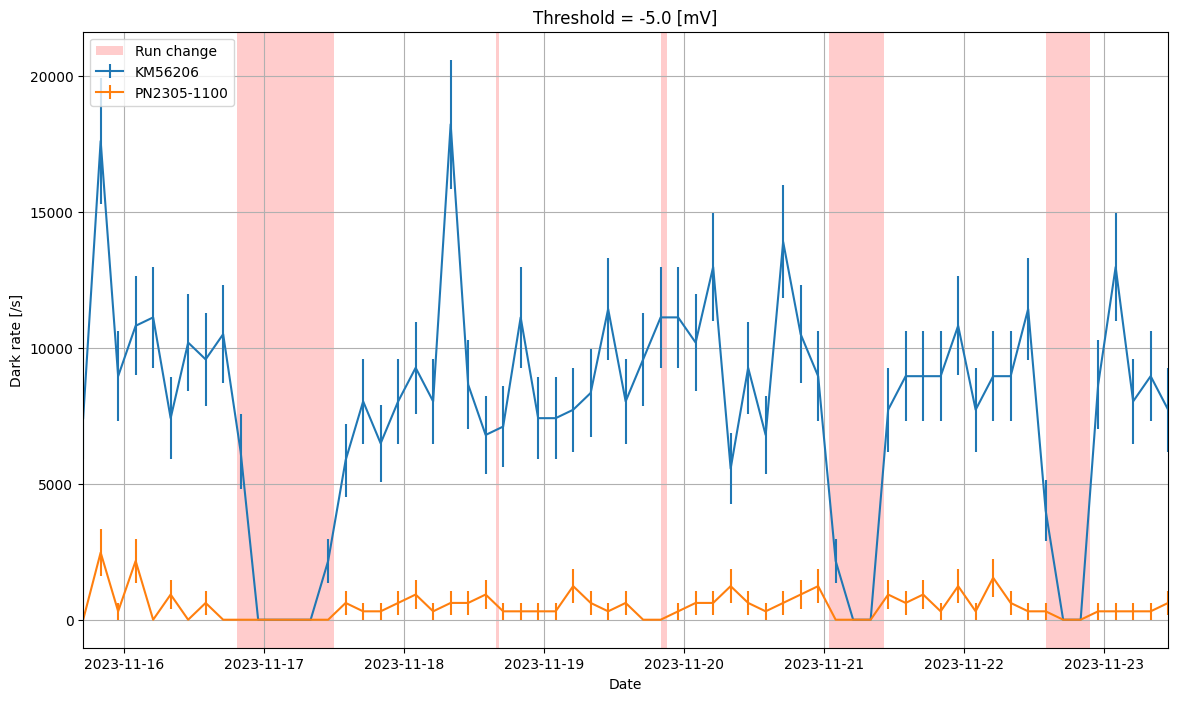

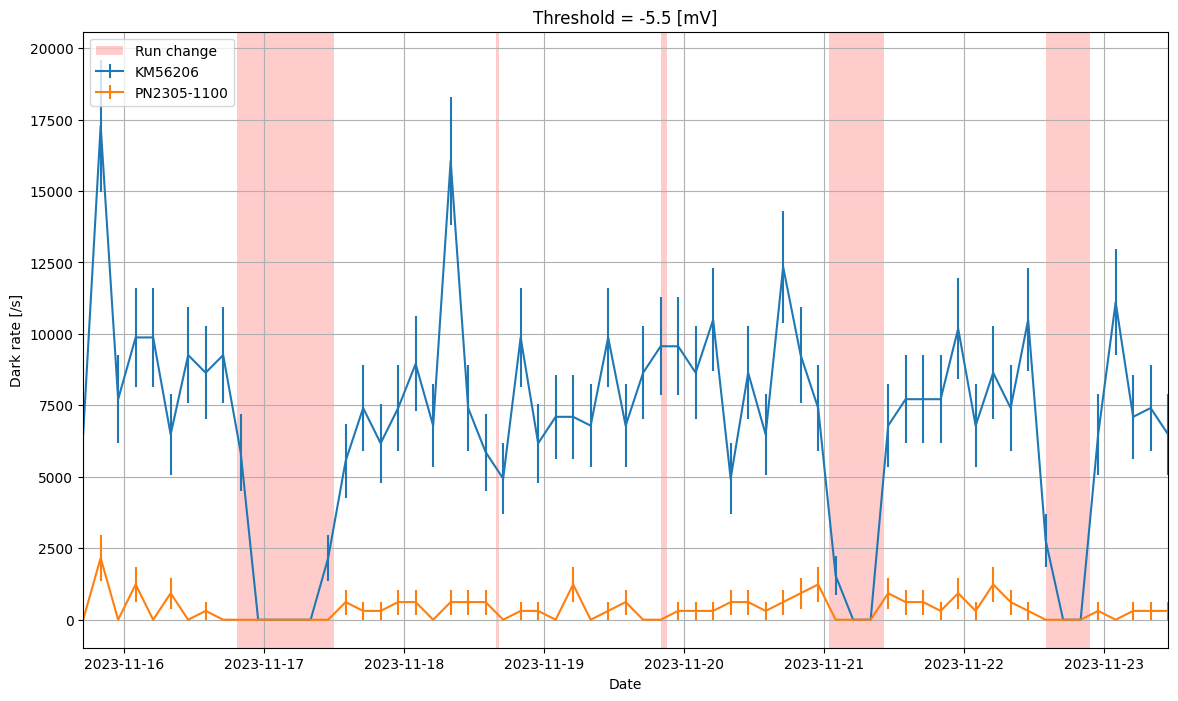

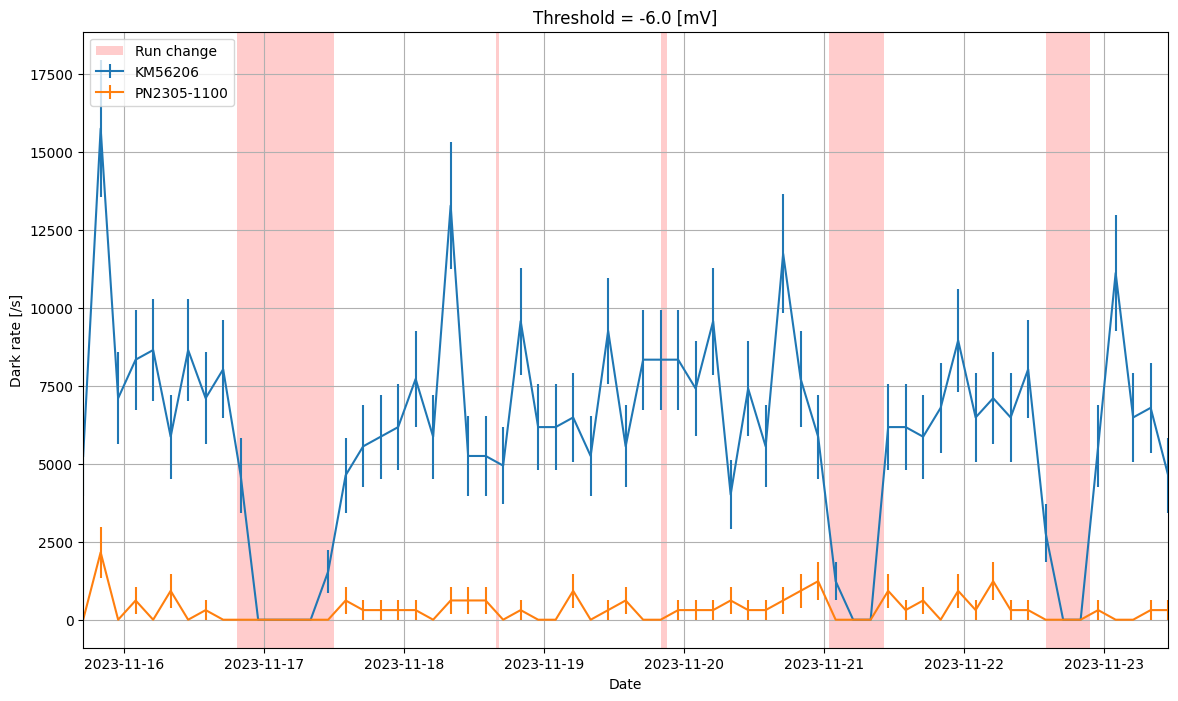

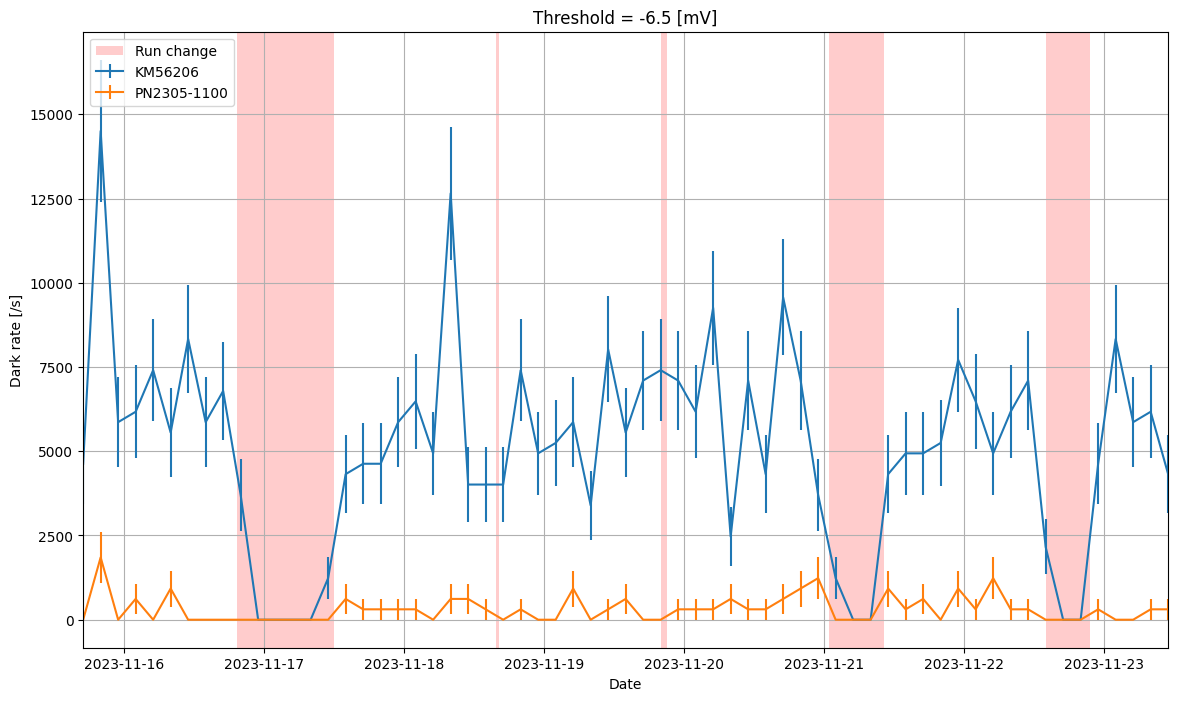

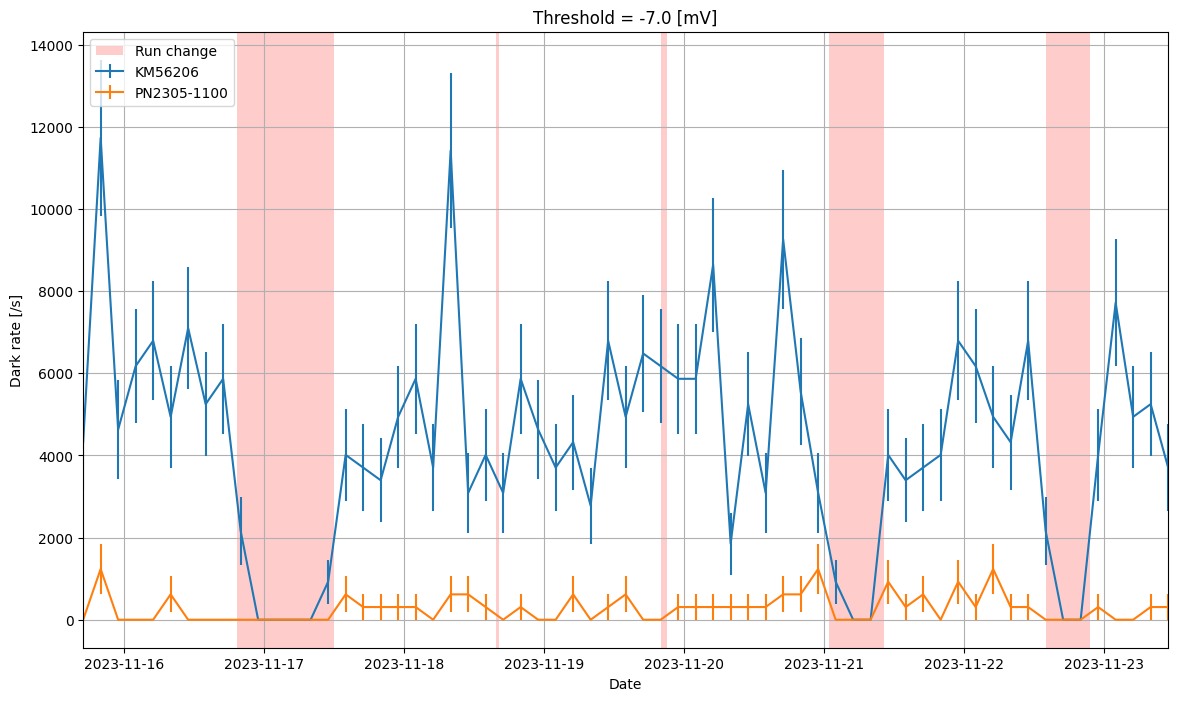

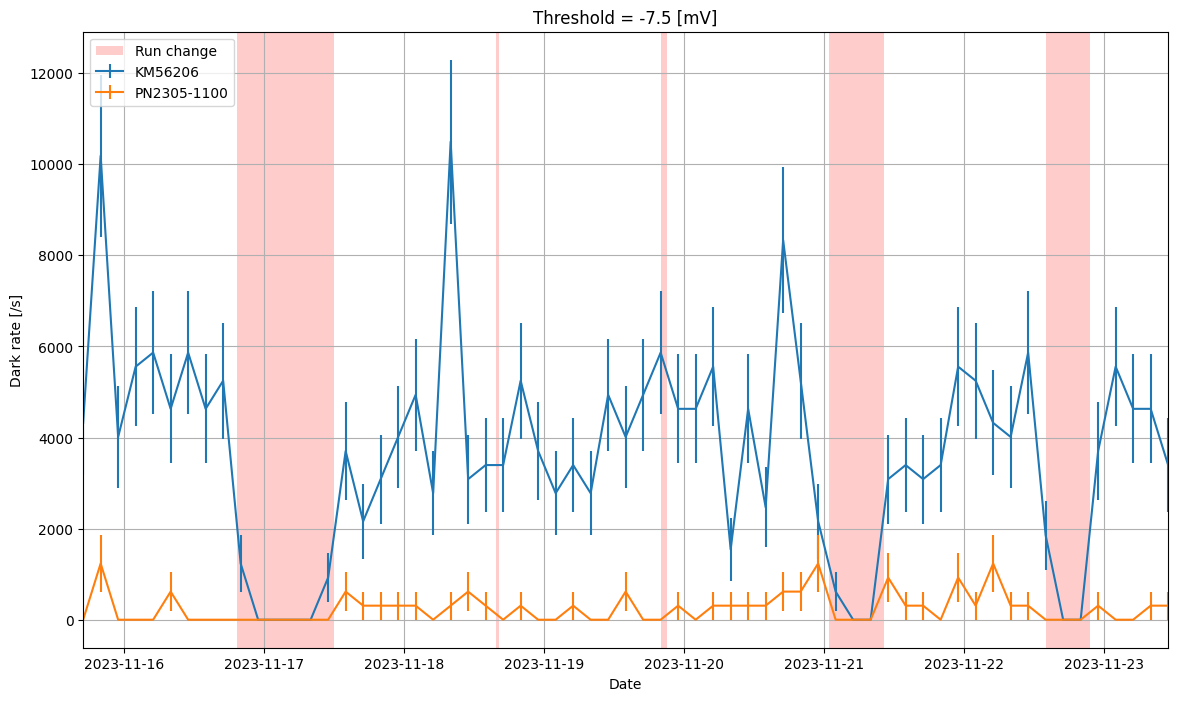

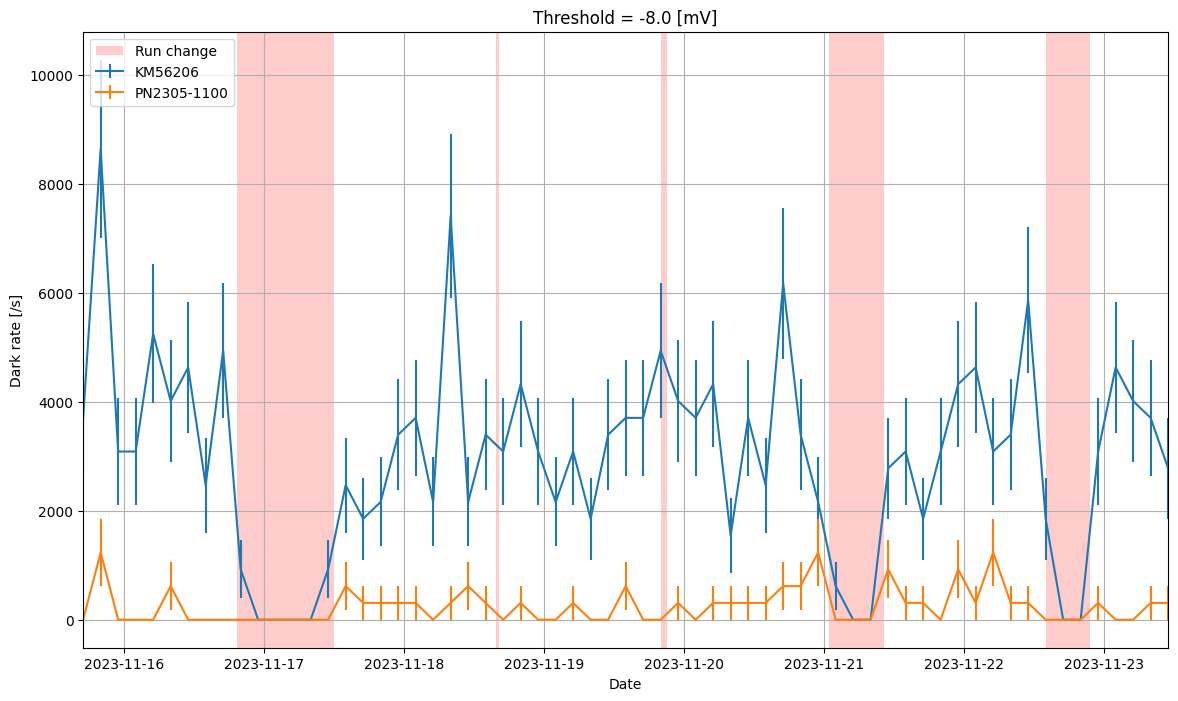

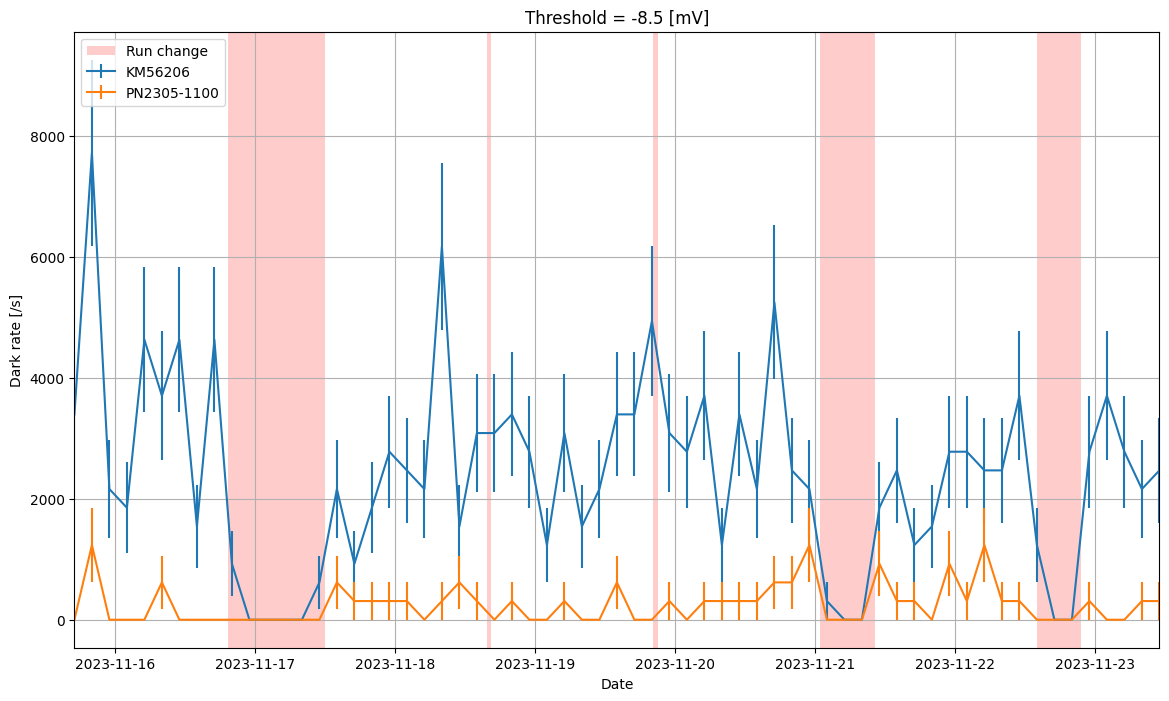

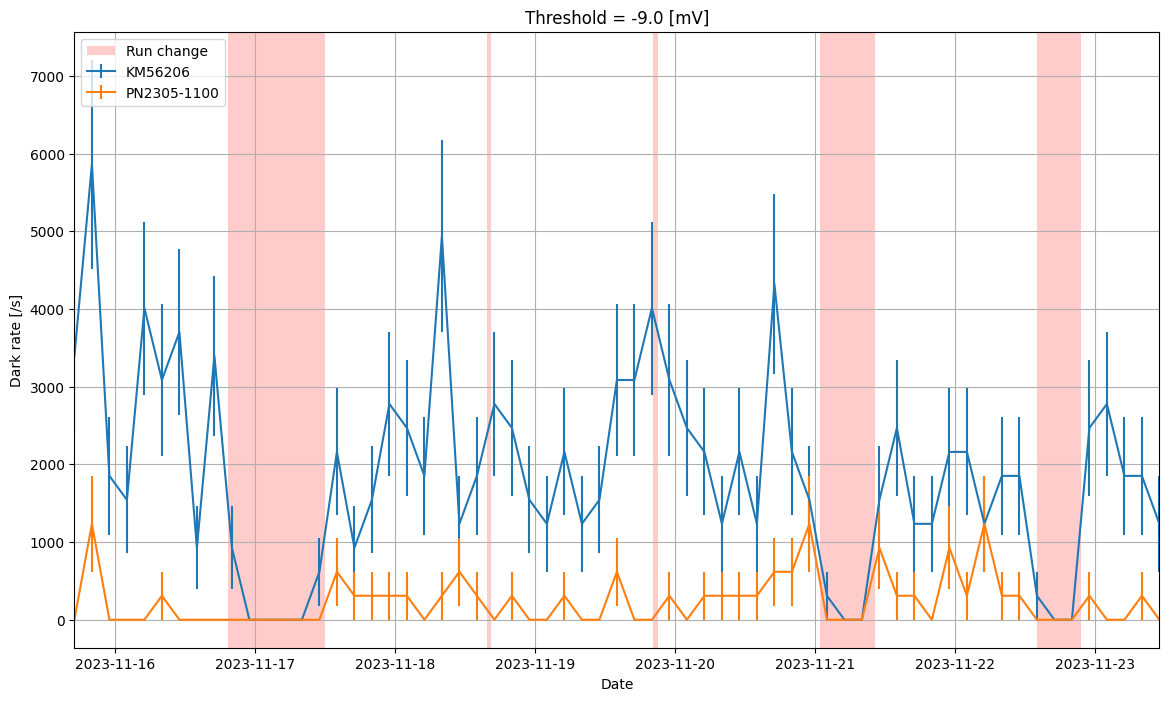

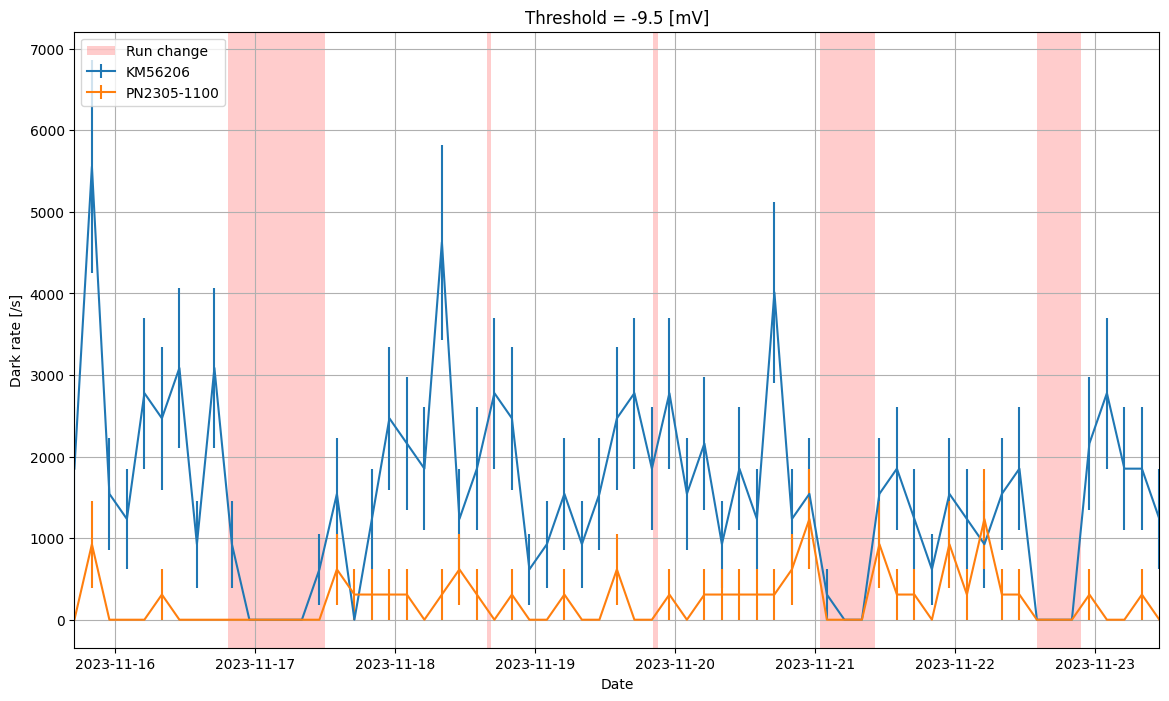

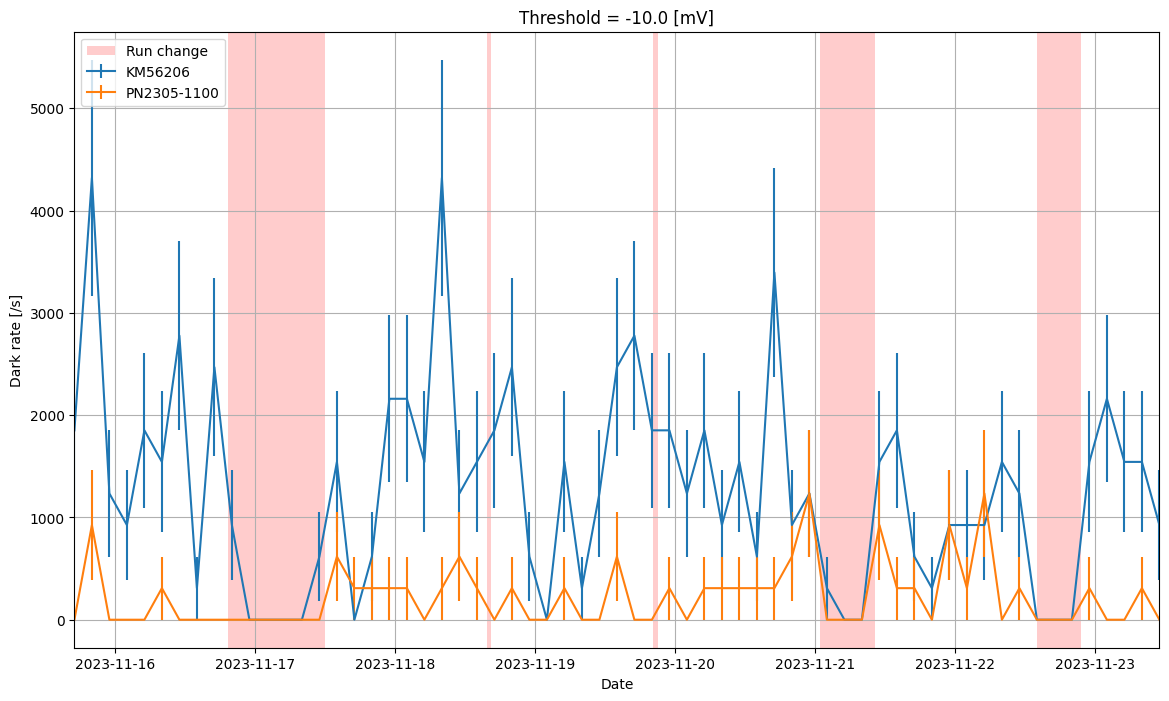

In [7]:
for i in range(len(indice)):
    fig, ax = plt.subplots(figsize=[14,8])
    title = 'Threshold = '+str(dat[i][-1])+' [mV]'
    ax.set_title(title)
    ax.set_xlabel('Date')
    ax.set_ylabel('Dark rate [/s]')
    ax.grid()

    for j in range(len(cols)-1):
        hist = np.histogram(dat[i][j]-start, range=[0, bin*binw], bins=bin)
        dr = hist[0]/(window_size*1e-9)/binw
        dr_err = np.sqrt(hist[0])/(window_size*1e-9)/binw
        center = (hist[1][:-1]+hist[1][1:])/2./3600. #[h]
        center_date = center*3600 + start
        #ax.errorbar(center, dr, yerr=dr_err, label=cols[j])
        ax.errorbar(center_date.astype(dtype='datetime64[s]'), dr, yerr=dr_err, label=cols[j])
        ax.set_xlim([center_date.astype(dtype='datetime64[s]')[0], center_date.astype(dtype='datetime64[s]')[-1]])
        
    for k in range(len(run_change_times)):
        #ax.axvspan(run_change_times[k][0], run_change_times[k][1], color='black', alpha=0.2, lw=0)
        if k==0:
            ax.axvspan(run_change_datetime[k][0], run_change_datetime[k][1], color='red', alpha=0.2, lw=0, label='Run change')
        else:
            ax.axvspan(run_change_datetime[k][0], run_change_datetime[k][1], color='red', alpha=0.2, lw=0)
        
    ax.legend()
    fig.show()